#  Unit 2.4b Using Programs with Data, SQL
> Using Programs with Data is focused on SQL and database actions.  Part B focuses on learning SQL commands, connections, and curses using an Imperative programming style,
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

# Database Programming is Program with Data
> Each Tri 2 Final Project should be an example of a Program with Data. 

>  Prepare to use SQLite in common Imperative Technique
- Explore [SQLite Connect object](https://www.tutorialspoint.com/python_data_access/python_sqlite_establishing_connection.htm) to establish database connection
- Explore [SQLite Cursor Object](https://www.tutorialspoint.com/python_data_access/python_sqlite_cursor_object.htm) to fetch data from a table within a database


## Schema of Users table in Sqlite.db
> Uses PRAGMA statement to read schema.

Describe Schema, here is resource [Resource](https://www.sqlite.org/index.html)

- What is a database schema?
      - A database schema defines how data is organized in a relational database.
- What is the purpose of identity Column in SQL database?
      - Identity columns can be used for generating key values. The identity property on a column guarantees the following: Each new value is generated based on the current seed & increment.
- What is the purpose of a primary key in SQL database?
      - A primary key is something that is used to identify someone. The primary key (i.e. id) should be unique to each user so that it is easy to tell who is who.
- What are the Data Types in SQL table?
      - In MySQL there are three main data types: string, numeric, and date and time.

In [2]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('users')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()


(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 1, None, 0)
(2, '_uid', 'VARCHAR(255)', 1, None, 0)
(3, '_password', 'VARCHAR(255)', 1, None, 0)
(4, '_dob', 'DATE', 0, None, 0)


## Reading Users table in Sqlite.db
> Uses SQL SELECT statement to read data

- What is a connection object?  After you google it, what do you think it does?
    - Connection Object is used to create an open connection to a data source. Through this connection, you can access and manipulate a database.
- Same for cursor object?
    - Cursor object is often used to retrieve and manipulate data row by row. The cursor allows you to navigate through the result set of a SQL query and perform operations on individual rows.
- Look at conn object and cursor object in VSCode debugger.  What attributes are in the object?
    - The conn object, which typically represents a database connection, may have the following attributes such as closed, commit, rollback, and arraysize.
- Is "results" an object?  How do you know?
    - Results is an object because it appears under the list of local variables. Additionally, it also includes the functionality of the program. 


In [3]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM users').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read()


(1, 'Thomas Edison', 'toby', 'sha256$0mpmV6673j7fV07i$5d854b7eb5523b76663d2e881ffd8d2e966fa73f8b353f84c7183a18be183d7f', '1847-02-11')
(2, 'Nikola Tesla', 'niko', 'sha256$Tk34CkHlC8TNSwS6$1eeea1a7fccb0e680dec7eeb52af23941cf825f1b8f21e6d94750b572299d897', '2023-03-15')
(3, 'Alexander Graham Bell', 'lex', 'sha256$5EKsmeZk8JJqsInh$a830e202ec18ffce518b755658266fa4e8cc425decc61caaeca36ad1c9ea1190', '2023-03-15')
(4, 'Eli Whitney', 'whit', 'sha256$kxyUiEWmGmsZhaS4$331ec614aa920c64204786a600f9387ecfc6b7401dbe906b1ac22b7a615a6edb', '2023-03-15')
(5, 'Indiana Jones', 'indi', 'sha256$Hg8AnWMJfjFM7ypi$937a7f2f7f0e08baa805ce9dd09eb4e01671b384622b8847e0b18b76e69f1f6f', '1920-10-21')
(6, 'Marion Ravenwood', 'raven', 'sha256$b7aP52s4XbphnTxd$74329889b5488472cda058cbe162fdab970c25ea3b19bd9c7750959a723cfec9', '1921-10-21')
(7, 'Harsha', 'Harsha', 'sha256$HHzFZp0IKWdcOEGQ$b69623ec3efec37f5e483aca4e40e6b3a2e6e40a21a59ae2d3d4b3e30958ad5c', '2023-12-09')
(8, '', '', 'sha256$mh09delXgKZMGbhB$bb068b20f671be7

## Create a new User in table in Sqlite.db
> Uses SQL INSERT to add row
-  Compore create() in both SQL lessons.  What is better or worse in the two implementations?
    - The imperative version involves creating numerous variabels within the function rather than objects. The imperatiev version is less error prone but also less efficient. Additionally, the imperative version does not censor your data when you put in your password. OOP is better for large amounts of data and imperative is better for small amounts of data.
-  Explain purpose of SQL INSERT.   Is this the same as User __init__?
    - The purpose of it is to insert a new row of data into the users table. This is similar to the init method but not exactly. The INSERT statement only inserts data into the database table, the init method creates a new instance of a class.

In [6]:
import sqlite3

def create():
    name = input("Enter your name:")
    uid = input("Enter your user id:")
    password = input("Enter your password")
    dob = input("Enter your date of birth 'YYYY-MM-DD'")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO users (_name, _uid, _password, _dob) VALUES (?, ?, ?, ?)", (name, uid, password, dob))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {uid} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#create()

## Updating a User in table in Sqlite.db
> Uses SQL UPDATE to modify password
- What does the hacked part do?
    - The hacked part of the code means to provide a password that meets the security requirements. 
- Explain try/except, when would except occur?
    - The try/except block is used to handle exceptions that may occur during the execution of the SQL command. In this case, the try block contains the SQL command to update the password for the specified user, and the except block catches any sqlite3. 
- What code seems to be repeated in each of these examples to point, why is it repeated?
    - The code that connects to the database (initializing the db). It is reapeated to prevent any data from leaking. 

In [ ]:
import sqlite3

def update():
    uid = input("Enter user id to update")
    password = input("Enter updated password")
    if len(password) < 2:
        message = "hacked"
        password = 'gothackednewpassword123'
    else:
        message = "successfully updated"

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE users SET _password = ? WHERE _uid = ?", (password, uid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            print(f"The row with user id {uid} the password has been {message}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#update()


## Delete a User in table in Sqlite.db
> Uses a delete function to remove a user based on a user input of the id.
- Is DELETE a dangerous operation?  Why?
    - DELETE can be a dangerous operation as it permanently removes data from the database, and if it is not used with caution, it can result in unintended data loss or corruption.
- In the print statemements, what is the "f" and what does {uid} do?
    - This is simply a way to format strings the curly braces that surround the uid indicates that it should be inserted at that position in the string. 

In [ ]:
import sqlite3

def delete():
    uid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM users WHERE _uid = ?", (uid,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with uid {uid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#delete()

# Menu Interface to CRUD operations
> CRUD and Schema interactions from one location by running menu. Observe input at the top of VSCode, observe output underneath code cell.
- Why does the menu repeat?
     - The menu repeats so that if the user would like to perform multiple operations at once. They can perform as many things as they like before the program exits. 
- Could you refactor this menu?  Make it work with a List?
    - Yes, you could do that.

In [ ]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


# Hacks
- Add this Blog to you own Blogging site.  In the Blog add notes and observations on each code cell.
- In this implementation, do you see procedural abstraction?
- In 2.4a or 2.4b lecture
    - Do you see data abstraction?  Complement this with Debugging example.
        - Yes, this implementation has a lot of procedural abstraction. There are functions created in order to be able to define what procedures we want to do in the code. 
    - Use Imperative or OOP style to Create a new Table or do something that applies to your CPT project.
    

Reference... [sqlite documentation](https://www.sqlitetutorial.net/sqlite-python/creating-tables/)


## Debugging Screenshots

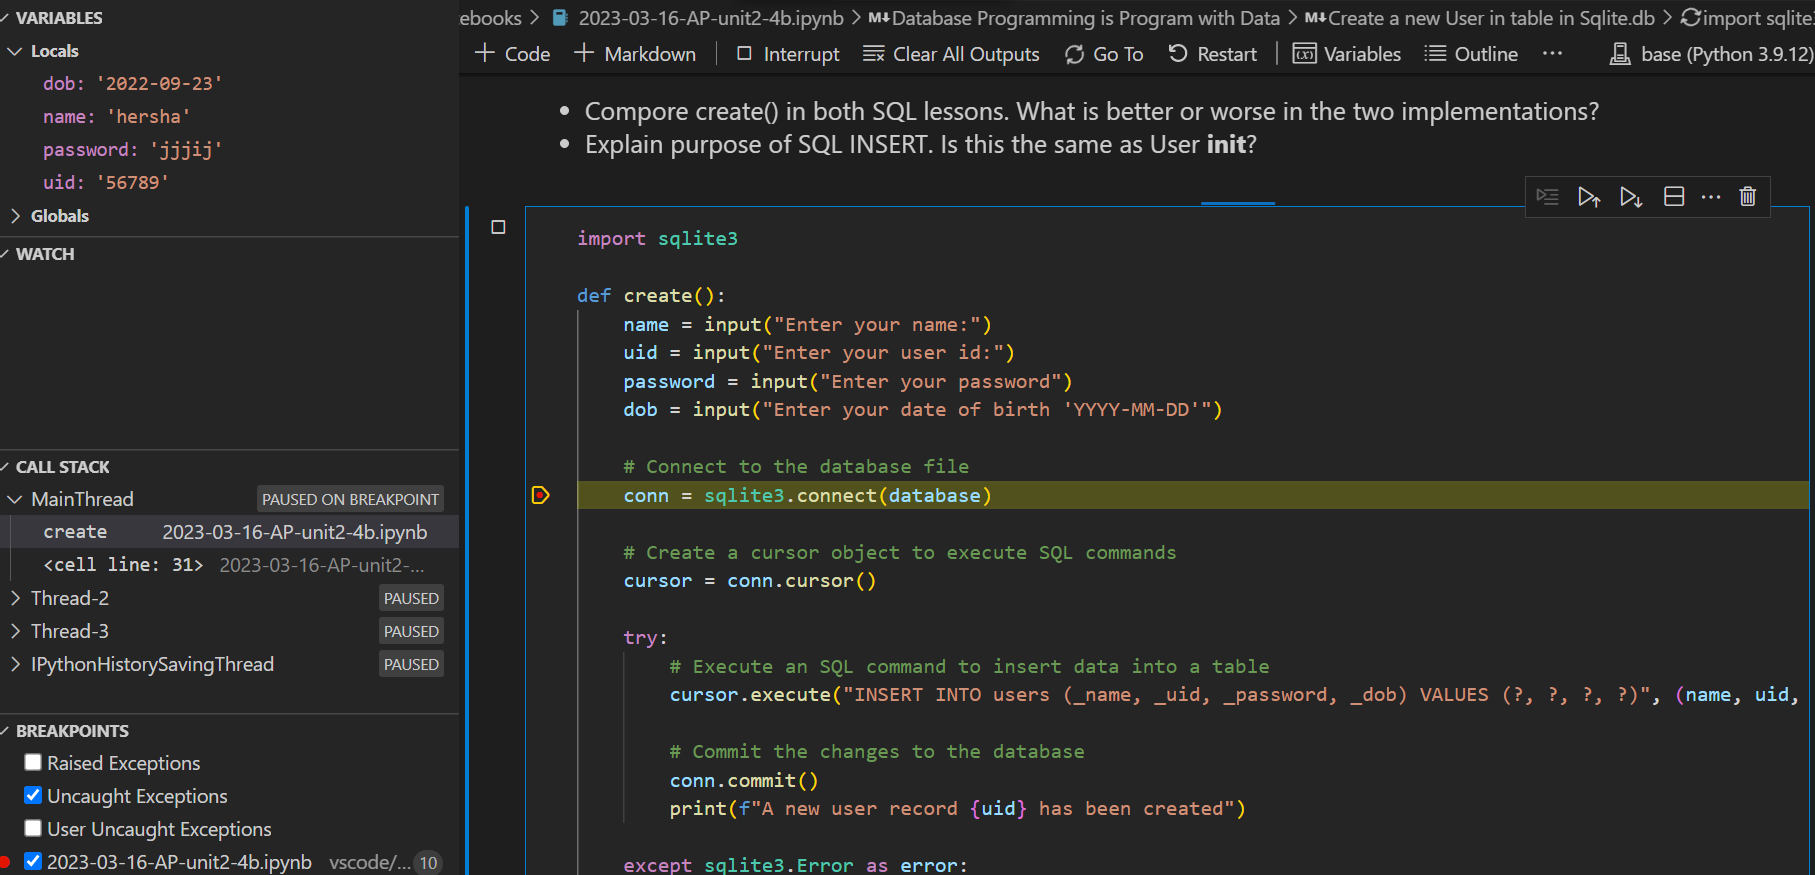
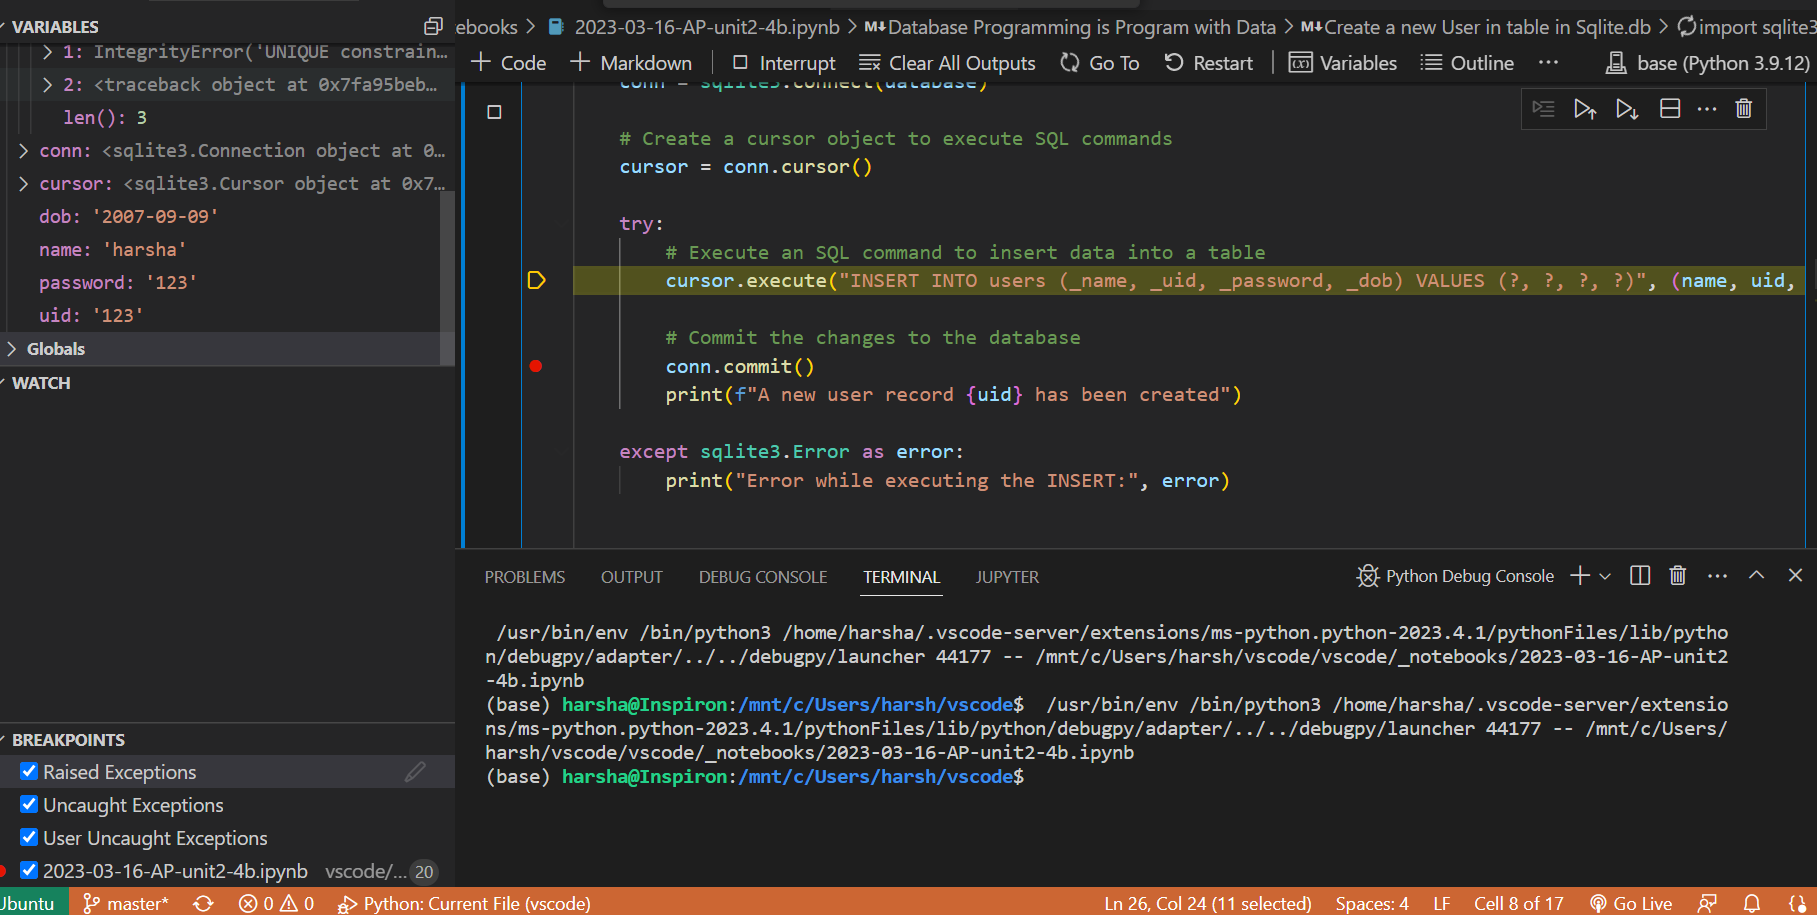

## DB Hacks

## Intialize DB

In [28]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('Recipes')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()

(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 1, None, 0)
(2, '_cooktime', 'INTEGER', 1, None, 0)
(3, '_ingredients', 'INTEGER', 1, None, 0)
(4, '_spice', 'INTEGER', 1, None, 0)


## Create

In [47]:
import sqlite3

def create():
    name = input("Enter the name of recipe")
    cooktime = input("Enter cooktime")
    ingredients = input("Enter ingredients")
    spice = input("Enter spice")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO Recipes (_name, _cooktime, _ingredients, _spice) VALUES (?, ?, ?, ?)", (name, cooktime, ingredients, spice))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new recipe {name} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()

create()

A new recipe Pongal has been created


## Read

In [48]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM Recipes').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read()

(1, 'Pasta', 25, 7, 5)
(2, 'Pizza', 27, 7, 8)
(3, 'Donut', 20, 5, 6)
(4, 'Tom Yum Soup', 19, 11, 7)
(5, 'Pongal', 30, 3, 3)


## Update

In [49]:
import sqlite3

def update():
    name = input("Enter name to update")
    price = input("Enter updated price")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
update()

## Delete

In [50]:
import sqlite3

def delete():
    name = input("Enter the name of the recipe to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM recipe WHERE name = ?", (name,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {name} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with name {name} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    

# CRUD Operations

In [51]:
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")

A new recipe Pasta Carbonara has been created
(1, 'Pasta', 25, 7, 5)
(2, 'Pizza', 27, 7, 8)
(3, 'Donut', 20, 5, 6)
(4, 'Tom Yum Soup', 19, 11, 7)
(5, 'Pongal', 30, 3, 3)
(6, 'Pasta Carbonara', 20, 23, 23)
